# Mzda dle pohlaví

Popis:
Údaje jsou počáteční platy všech 32 mužů a všech 61 žen, kteří pracují jako kvalifikovaní úředníci na základní úrovni.
přijatých bankou v letech 1969-1977.

Formát:
Datový rámec s 93 pozorováními těchto 2 proměnných.
Nástupní platy (v USD)
Pohlaví pohlaví úředníka

Datum: 16.12.2023

Ismakatov Tamerlan(ismaktam)

Rustamov Farukh(rustafar)

Seitzhan Sagadat(seitzsag)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
from scipy.stats import norm, expon, uniform,t,ttest_ind,ttest_1samp

Náš případ je case0102

In [2]:
data = pd.read_csv("case0102.csv")

# Úloha 1
> Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každu skupinu zvlášt’ odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

In [3]:
data.head()

,Salary,Sex
0,3900,Female
1,4020,Female
2,4290,Female
3,4380,Female
4,4380,Female


In [4]:
data.shape

(93, 2)

In [5]:
data.describe()

,Salary
count,93.000000
mean,5420.322581
std,709.587222
min,3900.000000
25%,4980.000000
50%,5400.000000
75%,6000.000000
max,8100.000000


### Skupinu jsme rozdělili na dvě části, ženy a muže.

In [6]:
male_data = data[data["Sex"] == "Male"]
female_data = data[data["Sex"] == "Female"]

In [7]:
male_data.shape

(32, 2)

In [8]:
female_data.shape

(61, 2)

### Funkce "function" odpovídá odhadu průměru, rozptylu a mediánu, přičemž se pracuje podle následujících vzorců:

Aritmetický průměr se počítá pomocí vzorce: $ \bar{X} = \frac{1}{n} \sum_{k=1}^{n} X_k $.

odhad rozptylu se počítá pomocí vzorce: $$ \text{var}(X) = s_n^2 = \frac{1}{n - 1} \sum_{k=1}^{n} (X_k - \bar{X})^2 $$
medián se počítá pomocí vzorce: $$ \text{median}(X_n) = 
\begin{cases} 
X_{\frac{n+1}{2}} & \text{if } n \mod 2 = 1 \\
\frac{X_{\frac{n}{2}} + X_{\frac{n}{2}+1}}{2} & \text{if } n \mod 2 = 0 
\end{cases}
$$


In [9]:
def function(data):
    mean = data['Salary'].mean()
    var = data['Salary'].var()
    median = data['Salary'].median()
    
    return(mean,var,median)

In [10]:
f_stats = function(female_data)
m_stats = function(male_data)

In [11]:
def printStats(data,group):
    print(("({}) mean : {}").format(group,data[0]))
    print(("({}) var : {}").format(group,data[1]))
    print(("({}) median : {}").format(group,data[2]))

Tedy jsme získali průměr, rozptyl a medián skupiny mužů.

In [12]:
printStats(m_stats,"Male")

(Male) mean : 5956.875
(Male) var : 477112.5
(Male) median : 6000.0


Tedy je průměr, rozptyl a medián skupiny žen

In [13]:
printStats(f_stats,"Female")

(Female) mean : 5138.852459016393
(Female) var : 291460.3278688526
(Female) median : 5220.0


# Úloha 2
> Pro každou skupinu zvlášt’ odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

Pomoci funkce `visualize_density_distribution(data, title)` jsme získali vizualizaci našich skupin, ve výstupu funkce vypíše odhad hustoty, histogram, empirickou distribuční funkci pro každou skupinu zvlášť.

In [14]:
def visualize_density_distribution(data, title):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data['Salary'], bins=10, kde=True)
    plt.title(f'Histogram skóre skupiny {title}')
    plt.xlabel('Salary')
    plt.ylabel('Density')
    
    plt.subplot(1, 2, 2)
    sns.ecdfplot(data['Salary'])
    plt.title(f'Empirická distribuční funkce skóre skupiny {title}')
    plt.xlabel('Salary')
    plt.ylabel('ECDF')
    
    plt.tight_layout()
    plt.show()

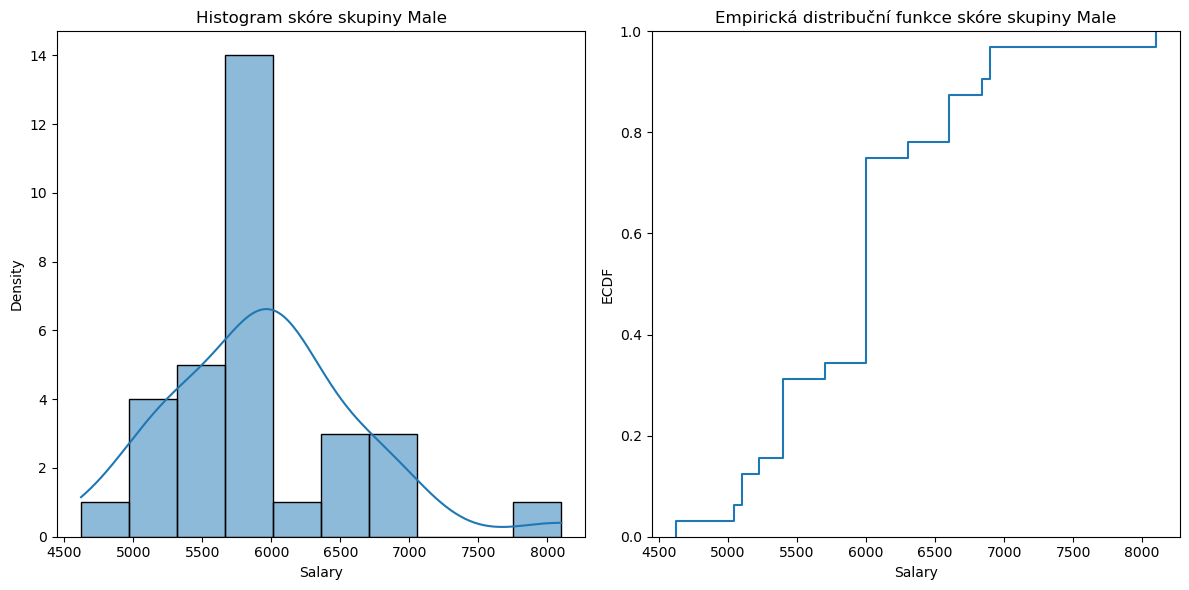

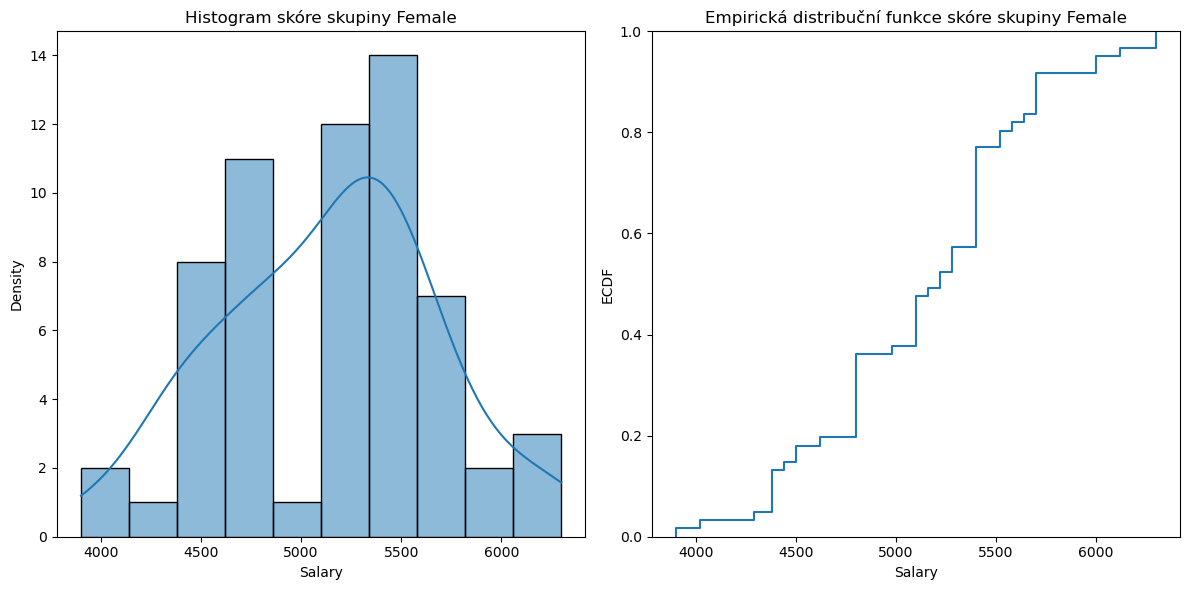

In [15]:
visualize_density_distribution(male_data, 'Male')
visualize_density_distribution(female_data, 'Female')

# Úloha 3
> Pro každou skupinu zvlášt’ najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

Funkce `plot_distributions(data, title)` odhaduje parametry normálního, exponenciálního a rovnoměrního rozdělení z údajů o platech a vykresluje odpovídající křivku do grafu.

`mean, std = norm.fit(data['Salary'])` odhadne průměr a směrodatnou odchylku dat o platech, `x = np.linspace(xmin, xmax, 100)` generuje 100 rovnoměrně rozmístněných bodů mezi xmin a xmax a vytvoří hladkou křivku, `p = norm.pdf(x, mean, std)` vypočítá hodnoty funkce hustoty pravděpodobnosti normálního rozdělení v těchto bodech.

In [16]:
def plot_distributions(data, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data['Salary'], bins=10, density=True, alpha=0.6, color='skyblue')

    # Odhad parametrů(normální rozdělení)
    mean, std = norm.fit(data['Salary']) 
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2, label=f'Normal dist. fit (μ={mean:.2f}, σ={std:.2f})')
    # Odhad parametrů(exponenciální rozdělení)
    loc, scale = expon.fit(data['Salary'])
    p = expon.pdf(x, loc, scale)
    plt.plot(x, p, 'r', linewidth=2, label=f'Exponential dist. fit (λ={1/scale:.2f})')
    # Odhad parametrů (rovnoměrné rozdělení)
    loc, scale = uniform.fit(data['Salary'])
    p = uniform.pdf(x, loc, scale)
    plt.plot(x, p, 'g', linewidth=2, label=f'Uniform dist. fit (a={loc:.2f}, b={loc+scale:.2f})')
    
    plt.title(f'({title}) Ilustrace různých rozdělení', fontsize=14)
    plt.xlabel('Salary', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.show()


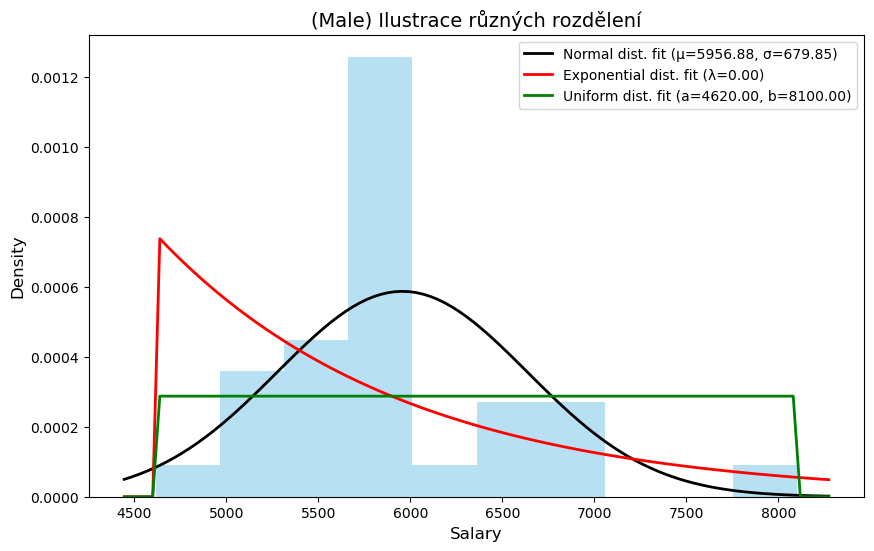

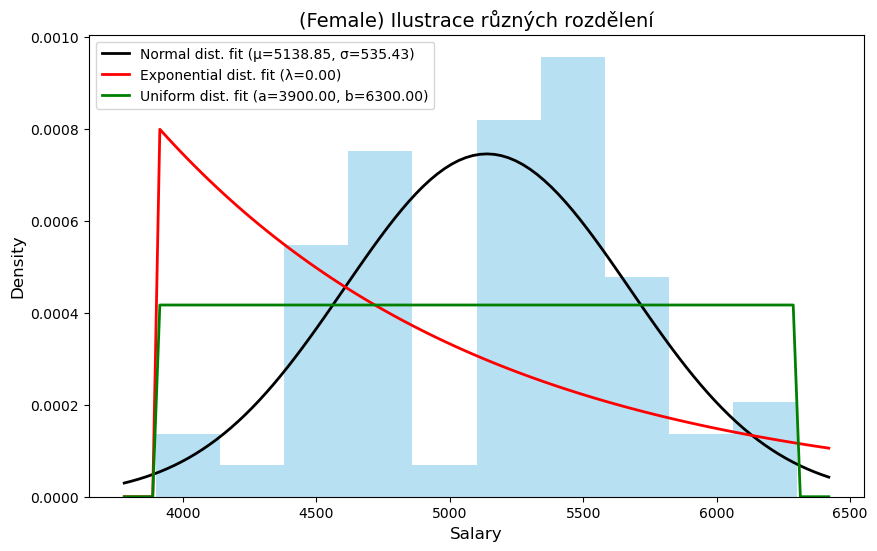

In [17]:
plot_distributions(male_data, 'Male')
plot_distributions(female_data, 'Female')

Vypadá to, že normální rozdělení nejlépe odpovídá datům pro obě skupiny, protože jeho křivka následuje tvar histogramu, zejména kolem středu rozdělení.
Exponenciální rozdělení není vhodné, protože data neukazují rychlý pokles frekvence. Rovnoměrné rozdělení také neodpovídá, jelikož data nejsou rovnoměrná.

# Úloha 4
> Pro každou skupinu zvlášt’ vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

Funkce `getStatsNormalDistribution(data)` je nástrojem pro modelování a analýzu rozdělení údajů o platech. Umožňuje porovnat původní údaje s informacemi vytvořenými na základě předpokládaného normálního rozdělení. Pomocí této funkce lze vizuálně zkontrolovat, zda data odpovídají normálnímu rozdělení, a také provést další statistické testy.

In [18]:
def getStatsNormalDistribution(data):
    mean, std = norm.fit(data['Salary'])
    simulated = np.random.normal(mean, std, 100)

    return mean, std, simulated

Funkce `generatedShow(data, title)` vytvoří vizualizaci vygenoravaných dat. Výsledkem je graf, který zobrazuje rozložení simulovaných údajů o platech

In [19]:
def generatedShow(data, title):
    plt.figure(figsize=(12,6))
    
    mean,std,simulated = getStatsNormalDistribution(data)
    if(title == 'Male'):
        plotColor = 'blue'
    else:
        plotColor = 'red'
        
    plt.subplot(1,2,1)
    sns.histplot(simulated, bins=10, color=plotColor, kde=True)
    plt.title(f'Histogram simulovaných hodnot - {title}')
    plt.xlabel('Mzda')
    plt.ylabel('Počet')
    
    plt.tight_layout()
    plt.show()

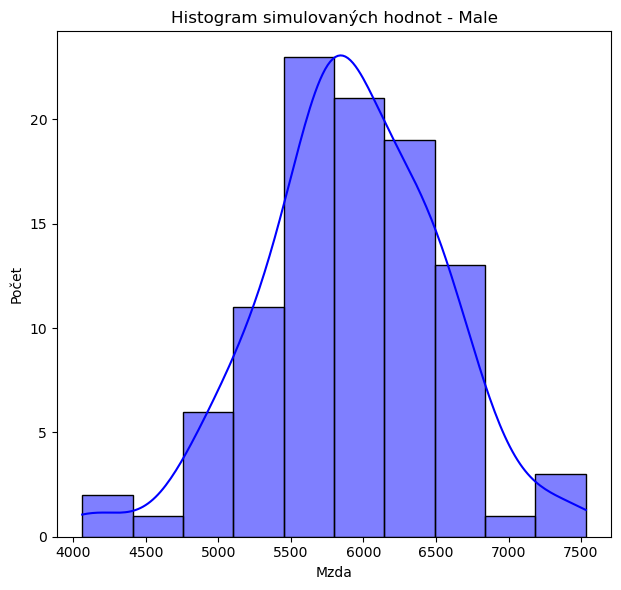

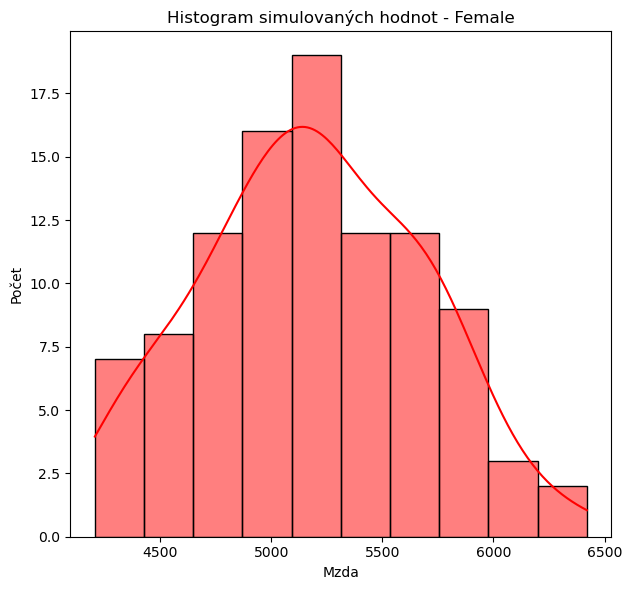

In [20]:
generatedShow(male_data,"Male")
generatedShow(female_data,"Female")

Vygenerované náhodný výběr o 100 hodnotách odpovídají očekávanému normálnímu rozdělení, což potvrzuje, že data o platech pro obě skupiny pocházejí z normálního rozdělení.

# Úloha 5
> Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

`calculate_95_confidence_interval(data)` je funkce, která slouží k výpočtu intervalu spolehlivosti střední hodnoty platů s 95% jistotou z poskytnutých údajů. Výsledkem je, že funkce vrátí dvě čísla, která představují dolní a horní hranici 95% intervalu spolehlivosti pro průměr platů v zadaných datech.

Proměnna n spočítá počet pozorování v datech. Pomoci funkce `getStatsNormalDistribution(data)` dostaneme průměr(mean) a směrodatnou odchylku(std), tyto proměnne potřebujeme pro normální rozdělení:
$$X \sim \mathcal{N}(\mu,\,\sigma^{2})$$


In [21]:
def calculate_95_confidence_interval(data):
    n = len(data)
    mean, std, f = getStatsNormalDistribution(data)
    se = std / np.sqrt(n)
    z_score = t.ppf(1 - 0.025, df=n-1)
    margin_error = z_score * se

    lower_bound = mean - margin_error
    upper_bound = mean + margin_error

    return lower_bound, upper_bound

male_confidence_interval = calculate_95_confidence_interval(male_data)
female_confidence_interval = calculate_95_confidence_interval(female_data)

In [22]:
def show_confidence_interval(data, confidence_interval, title):
    # Vytvoříme histogram
    sns.histplot(data, bins=15, kde=False, color='skyblue', alpha=0.6)

    # Zobrazíme hranice konfidenčního intervalu
    plt.axvline(x=confidence_interval[0], color='red', linestyle='--')
    plt.axvline(x=confidence_interval[1], color='green', linestyle='--')

    plt.title(f'({title}) Histogram a 95% konfidenční interval')
    plt.xlabel('Hodnoty')
    plt.ylabel('Frekvence')
    plt.show()

Male 95% CI: [5711.76, 6201.99]
Female 95% CI: [5001.72, 5275.98]


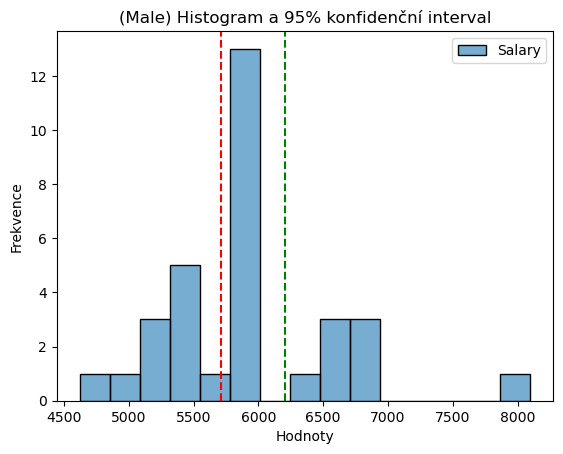

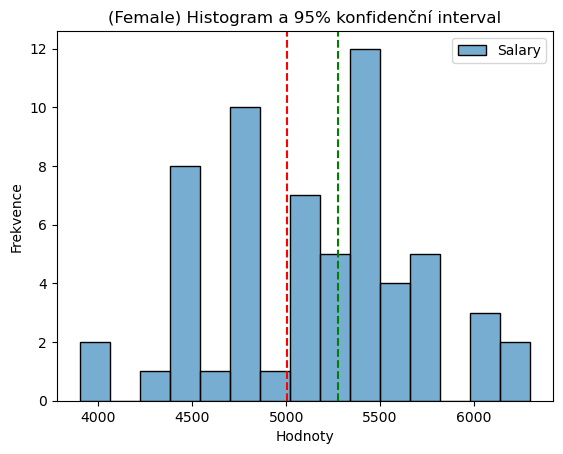

In [23]:
print(f"Male 95% CI: [{male_confidence_interval[0]:.2f}, {male_confidence_interval[1]:.2f}]")
print(f"Female 95% CI: [{female_confidence_interval[0]:.2f}, {female_confidence_interval[1]:.2f}]")
show_confidence_interval(male_data, male_confidence_interval, 'Male')
show_confidence_interval(female_data, female_confidence_interval, 'Female')

Konfidenční intervaly ukazují, kde se s 95% pravděpodobností mohou nacházet průměrné mzdy pro muže a ženy. Nepřekrývající se intervaly naznačují možné rozdíly v mzdách mezi pohlavími.

# Úloha 6
> Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

Funkce `test_hypothesis_one_sample(data, hypothesized_mean, group_name)` provede jednovýběrový t-test, který testuje, zda se výběrový průměr významně liší od nějakého předpokládaného průměru.

In [24]:
def test_hypothesis_one_sample(data, hypothesized_mean, group_name):

    test_statistic, p_value = ttest_1samp(data['Salary'], hypothesized_mean)
    
    alpha = 0.05
    
    print(f"({group_name}) Výsledky t-testu:")
    print(f"Testová statistika: {test_statistic:.4f}, p-hodnota: {p_value:.4f}")
    
    if p_value < alpha:
        print(f"Zamítáme nulovou hypotézu na prospěch alternativní hypotézu na hladině významnosti {alpha}.\n")
    else:
        print(f"Nemáme dostatečný důkaz k zamítnutí nulové hypotézy: střední hodnota se statisticky významně neliší od {hypothesized_mean}.\n")

In [25]:
hypothesized_mean = data['Salary'].median()

test_hypothesis_one_sample(male_data, hypothesized_mean, "Male")

test_hypothesis_one_sample(female_data, hypothesized_mean, "Female")

(Male) Výsledky t-testu:
Testová statistika: 4.5606, p-hodnota: 0.0001
Zamítáme nulovou hypotézu na prospěch alternativní hypotézu na hladině významnosti 0.05.

(Female) Výsledky t-testu:
Testová statistika: -3.7780, p-hodnota: 0.0004
Zamítáme nulovou hypotézu na prospěch alternativní hypotézu na hladině významnosti 0.05.



#### Výsledky t-testu pro obě skupiny ukazují, že průměrné mzdy mužů a žen se statisticky významně liší od předpokládané průměrné mzdy 5400. V obou případech je nulová hypotéza zamítnuta na 5% úrovni významnosti

# Úloha 7
> Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

Funkce `test_hypothesis_two_samples(data1, data2, group1_name, group2_name, alpha=0.05)` provede dvouvýběrový t-test pro porovnání průměrných hodnot platů dvou různých skupin.

In [26]:
def test_hypothesis_two_samples(data1, data2, group1_name, group2_name, alpha=0.05):
    # Zde provadíme t-test
    test_statistic, p_value = ttest_ind(data1['Salary'], data2['Salary'])

    # Náš výpis
    print(f"Výsledky t-testu mezi {group1_name} a {group2_name}:")
    print(f"Testová statistika: {test_statistic:.4f}, p-hodnota: {p_value:.4f}")

    # Porovnováme p-hodnoty
    if p_value < alpha:
        print(f"Zamítáme nulovou hypotézu, střední hodnoty se liší na hladině významnosti {alpha}.\n")
    else:
        print(f"Nemáme dostatečný důkaz k zamítnutí nulové hypotézy, střední hodnoty se nezdají být statisticky významně různé.\n")

In [27]:
test_hypothesis_two_samples(male_data, female_data, "Male", "Female")

Výsledky t-testu mezi Male a Female:
Testová statistika: 6.2926, p-hodnota: 0.0000
Zamítáme nulovou hypotézu, střední hodnoty se liší na hladině významnosti 0.05.



Výsledky t-testu pro obě skupiny naznačují, že průměrné mzdy mužů a žen se statisticky významně liší od předpokládané průměrné mzdy 5400. V obou případech je nulová hypotéza zamítnuta na úrovni významnosti 5 %.

### Závěr:
### Nakonec můžeme říci, že v 70. letech se platy mužů a žen lišily, přestože obě skupiny vykazovaly stejnou produktivitu, platy žen byly nižší než platy mužů, což je nepřijatelné. V 21. století by lidé měli usilovat o rovnost, protože pokud jedna skupina dostává za stejnou práci více než druhá, jedná se o genderovou diskriminaci. Můžeme to uvidět v první úloze:
### V první úloze jsme si ukázali obecnou statistiku platů, na základě údajů ze souboru vidíme, že nejvíce žen dostávalo průměrný plat a méně (od 5400 a méně), zatímco nejvyšší platy měli muži (od 6000 a více), to je vidět na výstupu funkce printStats, kde průměrný plat žen byl 5138, zatímco průměrný plat mužů byl 5956.